# Métodos numéricos para solución de ecuaciones diferenciales
Notebook de Jean Carlo Trejo Sánchez

### 1. 2 Método de Runge-Kutta

El método de Euler mostrado en el notebook anterior, se basa en la integración aproximada por diferencias  finitas, no obstante, pueden obtenerse métodos más precisos y estables como el método de Runge-Kutta que se expone a continuación:

Si tenemos la ecuación diferencial ordinaria: 

\begin{align*}
\frac{dx}{dt}=f(x,t)\tag{1.13}
\end{align*}

Podemos integrar de ambos lados de la igualdad en un intervalo $[t_{n},t_{n+1}]$:

\begin{align*}
y(t_{n+1})-y(t_n) = \int_{t_n}^{t_{n+1}} f(t,y) dt \tag{1.14}
\end{align*}

Y despejar para obtener $y(t_{n+1})$ a partir de $y(t_n)$:

\begin{align*}
y(t_{n+1}) &= y(t_n) +\int_{t_n}^{t_{n+1}} f(t,y) dt \\
&\approx y(t_n) + \frac{h}{2} \left[ f(t_n,y_n)+f(t_{n+1},y_{n+1}) \right] \tag{1.15}
\end{align*}

Donde hemos aplicado el valor de la integral al área del trapecio considerando $h=t_{n-1}-t_{n}$. Notemos que $y_{n+1}$ también aparece en el lado derecho de la ecuación como argumento de la función $f$, por lo que aproximaremos este segundo término mediante el método de Euler, de modo que se tendrá:

\begin{align*}
\tilde{y}_{n+1} &= y_n + h f(y_n,t_n) \\
                &= y_n + \frac{h}{2}[f(y_n,t_n) + f(\tilde{y}_{n+1},t_{n+1})  ] \tag{1.16}
\end{align*}

Donde $y_{n+1}$ es la aproximación de $\tilde{y}_{n+1}$, así que podemos escribirlo de la siguiente manera:

\begin{align*}
y_{n+1}= y_{n}+\frac{1}{2} [k_1+k_2] \tag{1.17}
\end{align*}

Obteniendo así la expresión general del método de Runge-Kutta de segundo orden, donde:

\begin{align*}
k_1 &= hf(y_n,t_n)\\
    k_2 &= hf(y_n+k_1,t_{n+1})
\end{align*}

Del mismo modo en el que se obtenía la solución numérica de una ecuación diferencial de segundo orden mediante un sistema de ecuaciones simultaneas de primer orden con el método de Euler, es posible escribir el método de Runge-Kutta para el sistema

\begin{align*}
    \frac{dx}{dt} &= v \\
    \frac{dv}{dt} &= f(x,v,t) \tag{1.18}
\end{align*}

Como:

\begin{align*}
    x_{n+1} &= x_n + \frac{1}{2} (k_1+k_2) \\
    v_{n+1} &= v_n + \frac{1}{2} (l_1+l_2) \tag{1.19}
\end{align*}

Con los siguientes coeficientes:

\begin{align*}
    k_1 &= hv(x_n,t_n) \\
    l_1 &= hf(x_n,v_n,t_n) \\
    k_2 &= h(v_n + l_1) \\
    l_2 &= hf(x_n+k_1,v_n+l_1,t_{n+1})
\end{align*}

A continuación se muestra el código de un programa para calcular 1000 posiciones angulares del péndulo en un intervalo de 10 segundos empleado de Runge-Kutta de segundo orden. Hay 0.01 segundos entre cada cuadro. El péndulo tiene una longitud $l$ de 0.5 m, parte del reposo ($v_0=0$) desde una posición inicial $\theta_0=\frac{\pi}{5}$, con una constante de fricción de $\beta = 0.6$, de manera que la ecuación a resolver es:

\begin{align*}
\frac{d\theta^2}{dt^2} = -\frac{g}{l}\sin(\theta) - \beta\frac{d\theta}{dt}
\end{align*}
 

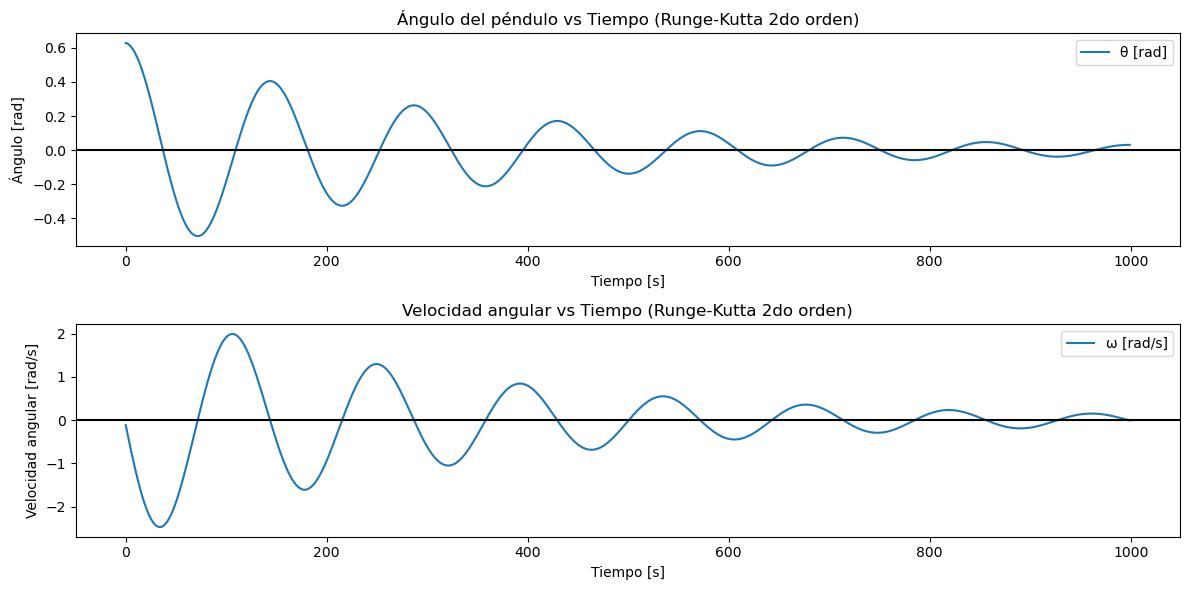

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
h = 0.01 # [s] Intervalo de tiempo entre cada iteración
g = 9.81 # [m/s^2]
l = 0.5 # [m]
x = np.pi/5 #[rad]
v = 0.0 #[m/s]

#Función que describe la aceleración angular
def f(x,v):
    return -(g/l)*np.sin(x) - 0.6*v

#Declaración de los vectores donde se guardarán los valores
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación usando el método de Runge-Kutta
for t in range(1000):
    k1 = h*v
    l1 = h*f(x,v)
    k2 = h*(v+l1)
    l2 = h*f(x+k1,v+l1)
    x = x + (1/2)*(k1+k2)
    v = v + (1/2)*(l1+l2)
    # Almacenando los valores de las variables a medida que se itera t
    X[t] = x
    V[t] = v
    T[t] = t+h

#Graficando la función
plt.figure(figsize=(12,6))

#Gráfica θ (X) vs t
plt.subplot(2,1,1)
plt.plot(T,X, label = 'θ [rad]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title('Ángulo del péndulo vs Tiempo (Runge-Kutta 2do orden)')
plt.legend()

#Gráfica ω(v) vs t
plt.subplot(2,1,2)
plt.plot(T,V, label='ω [rad/s]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Velocidad angular vs Tiempo (Runge-Kutta 2do orden)')
plt.legend()

plt.tight_layout() # Ajusta los márgenes de las gráficas para no encimarlas

Ahora bien, con la fórimla de 1/3 de Simpson para la integral se obtiene una mejor precisión dando lugar al método de Runge-Kutta de tercer orden, esto es la integral:

\begin{align*}
y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(y,t) dt \tag{1.20}
\end{align*}

Puede expresarse numéricamente como:

\begin{align*}
y_{n+1} = y_n + \frac{h}{6} \left[ f(y_n,t_n) +  4f\left(\tilde{y}_{n+\frac{1}{2}},t_{n+\frac{1}{2}}\right) + f(\tilde{y}_{n+1},t_{n+1}) \right]  \tag{1.21}
\end{align*}

Donde $\tilde{y}_{n+\frac{1}{2}}$ y $\tilde{y}_{n+1}$ son estimaciones que se obtendrán nuevamente del método de Euler, de modo que el esquema del método quedaría así:

\begin{align*} 
    k_1 &= hf(y_n,t_n) \\
    k_2 &= hf(y_n + \frac{1}{2}k_1,t_n + \frac{h}{2}) \\
    k_3 &= hf(y_n-k_1+2k_2,t_n+h) \tag{1.22}\\
    y_{n+1} &= y_n + \frac{1}{6} (k_1+4k_2+k_3)
\end{align*}

Y la extensión para resolver el sistema de ecuaciones (1.18) seróa el siguiente:

\begin{align*} 
    k_1 &= hv_n \\
    l_1 &= hf(x_n,v_n,t_n) \\
    k_2 &= h\left(v_n+\frac{1}{2}l_1\right) \\
    l_2 &= hf\left(x_n + \frac{1}{2}k_1,v_n+\frac{1}{2}l_1,t_n+\frac{h}{2}\right) \tag{1.23} \\
    k_3 &= h(v_n-l_1+2l_2) \\
    l_3 &= hf(x_n-k_1+2k_2,v_n-l_1+2l_2,t_n+h)
\end{align*}

Además:

\begin{align*}
v_{n+1} &= v_n + \frac{1}{6} \left[ l_1+4l_2+l_3 \right] \\
x_{n+1} &= x_n + \frac{1}{6}[k_1+4k_2+k_3 ] \tag{1.24}
\end{align*}

En el código siguiente se implementará el método de Runge-Kutta de tercer orden para el ejemplo del péndulo no lineal (fuera del intervalo donde es válida la aproximación $\sin\theta \approx \theta$) sin fricción. En este caso se ha variado el ángulo inicial a $\theta = 0.99 \pi $ teniendo así un equilibrio inestable.

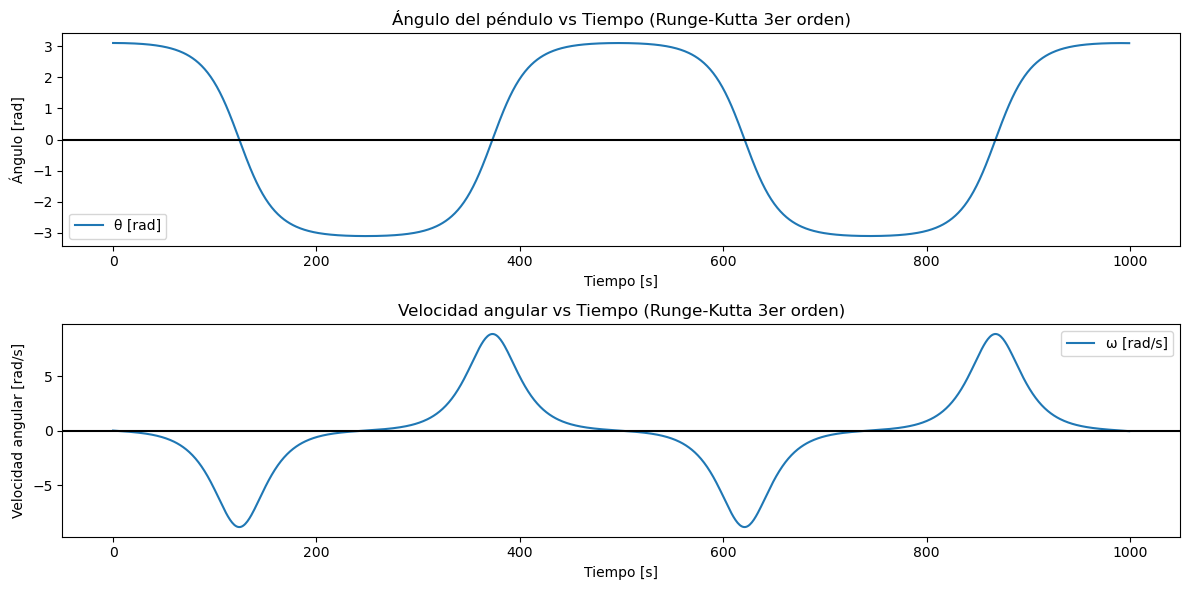

In [38]:
#Parámetros
h = 0.01 # [s] Intervalo de tiempo entre cada iteración
g = 9.81 # [m/s^2]
l = 0.5 # [m]
x = 0.99*np.pi #[rad]
v = 0.0 #[m/s]

#Función que describe la aceleración angular
def f(x,v):
    return -(g/l)*np.sin(x) 

#Declaración de los vectores donde se guardarán los valores
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación usando el método de Runge-Kutta
for t in range(1000):
    k1 = h*v
    l1 = h*f(x,v)
    k2 = h*(v+l1/2)
    l2 = h*f(x + k1/2, v + l1/2)
    k3 = h*(v-l1+2*l2)
    l3 = h*f(x-k1+2*k2,v-l1+2*l2)
    x = x + (1/6)*(k1+4*k2+k3)
    v = v + (1/6)*(l1+4*l2+l3)
    #Almacenando los valores de las variables a medida que se itera t
    X[t] = x
    V[t] = v
    T[t] = t+h

#Graficando la función
plt.figure(figsize=(12,6))

#Gráfica θ (X) vs t
plt.subplot(2,1,1)
plt.plot(T,X, label = 'θ [rad]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title('Ángulo del péndulo vs Tiempo (Runge-Kutta 3er orden)')
plt.legend()

#Gráfica ω(v) vs t
plt.subplot(2,1,2)
plt.plot(T,V, label='ω [rad/s]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Velocidad angular vs Tiempo (Runge-Kutta 3er orden)')
plt.legend()

plt.tight_layout() # Ajusta los márgenes de las gráficas para no encimarlas

De manera análoga, se pueden ir agregando términos a la aproximación numérica de la integral y realiar el mismo proceso para encontrar métodos cada vez más precisos, incluso existe el llamado **Método de Runge-Kutta de orden general**, el cual tiene la siguiente expresión:

\begin{align*}
x_{n+1} = x_n + h\sum_{r=1}^{R} a_rk_r \tag{1.25}
\end{align*}

Donde 

\begin{align*}
k_1 = f(x_n,t_n)
\end{align*}

Y $k_2,k_3,...,k_R$ están definidas por la siguiente relación recurrente:

\begin{align*}
k_r = f\left( x_n + h \sum_{s=1}^{r-1} q_{r,s}k_s,t_n+hp_r \right) \tag{1.25}
\end{align*}

Ahora bien, es necesaria la manipulación algebráica para encontrar los valores de los coeficientes $p,q$ y $a$. A continuación se desarrollará el método de Runge-Kutta de cuarto orden para ejemplificar el desarrollo general.

De (1.25) se tiene

\begin{align*}
x_{n+1} &=x_n + h(a_1k_1+a_2k_2+a_3k_3+a_4k_4) \tag{1.27}
\end{align*}

Y de (1.26) se tiene:

\begin{align*}
k_1 &= f(x_n,t_n)\\
k_2 &= f(x_n+h[q_{2,1}k_1],t_n+hp_2)\\
k_3 &= f(x_n+h[q_{3,3}k_1+q_{3,2}k_2],t_n+hp_3)\\
k_4 &= f(x_n+h[q_{4,1}k_1+q_{4,2}k_2+q_{4,3}k_3],t_n+hp_4)
\end{align*}

Obteniendo los coeficientes del método de la serie de Taylor de orden $N=4$ mediante la siguiente relación:

\begin{align*}
x_{n+1}= x_n +d_1h + \frac{d_2h^2}{2!} + \frac{d_3h^3}{3!} + \frac{d_4h^4}{4!}+...+ \frac{d_Nh^N}{N!}
\end{align*}

Es posible comparar estos Con las expresiones anteriores para $k_2$, $k_3$, $k_4$, identificar los términos y llegar al siguiente conjunto de ecuaciones:

\begin{align*}
a_2p_1 + a_3p_2 + a_4p_3 = \frac{1}{2} \\
a_2p_1^2 + a_3p_2^2 + a_4p_3^2 = \frac{1}{3} \\
a_2p_1^3 + a_3p_2^3 + a_4p_3^3 = \frac{1}{4} \\
a_3p_1q_{3,2} + a_4(p_1q_{4,2}+p_2q_{4,3}) = \frac{1}{6} \tag{1.29} \\
a_3p_1p_2q_{3,2} + a_4p_3(a1q_{4,2}+p_2q_{4,3}) = \frac{1}{8} \\
a_3p_1^2q_{3,2}+a_4(p_1^2q_{4,2}+p_2^2q_{4,3}) = \frac{1}{12} \\
a_4p_1q_{3,2}q_{4,3} = \frac{1}{24}
\end{align*}

Y las condiciones:

\begin{align*}
    p_r &= \sum_{s=1}^{r-1} q_{r,s}   &   &y   &    \sum_{r=1}^{R} a_r &=1 \tag{1.30}
\end{align*}

Se tendrían 11 ecuaciones con 13 incógnitas, de modo que debemos incluir dos condiciones adicionales, por simplicidad se eligen

\begin{align*}
    p_1 &= \frac{1}{2}   &   &y   &    q_{3,1} &= 0 
\end{align*}

Entonces resolviendo el sistema, se tiene que:

\begin{align*}
p_1 &= \frac{1}{2}  &   p_3 &= 1\\
q_{2,1}&=\frac{1}{2}  &  q_{3,2}&=\frac{1}{2}  &  q_{4,1}&=0  &   q_{4,2}&=0  &  q_{4,3}&=1 \tag{1.31} \\
a_1&=\frac{1}{6}  &  a_2&=\frac{1}{3}  &  a_3&=\frac{1}{3}  &   a_4&=\frac{1}{6}  
\end{align*}

de modo que el esquema final del Método de Runge-Kutta de cuarto orden es:

\begin{align*}
x_{n+1} = x_n + \frac{1}{6} (k_1 + 2k_1 + 2k_3 + k_4) \tag{1.32}
\end{align*}

Con

\begin{align*}
k_1 &= hf(x_n,v_n) \\
k_2 &= hf\left(x_n+\frac{k_1}{2},t_n + \frac{h}{2}\right) \\
k_3 &= hf\left(x_n+\frac{k_2}{2},t_n + \frac{h}{2}\right)\\
k_4 &= hf\left(x_n+k_3 ,t_n + h \right)\\
\end{align*}

De manera análoga se puede plantear un sistema de ecaciones para resolver ecuaciones diferenciales de segundo orden y obtener un esquema similar al presentado em las ecuaciones (1.23) y (1.24):

\begin{align*}
k_1 &= hv_n \\
l_1 &= hf(x_n,v_n,t_n) \\
k_2 &= h\left(v_n + \frac{1}{2} l_1 \right) \\
l_2 &= hf \left( x_n+\frac{1}{2}k_1,v_n+\frac{1}{2}l_1,t_n + \frac{h}{2} \right) \\
k_3 &= h \left( v_n+\frac{1}{2}l_2 \right) \tag{1.33} \\
l_3 &= hf \left( x_n+\frac{1}{2}k_2,v_n+\frac{1}{2}l_2,t_n + \frac{h}{2} \right) \\
k_4 &= h\left(v_n+l_3 \right)\\
l_4 &= hf \left( x_n+2k_3,v_n+2l_3,t_n + h \right) \\
\end{align*}

Y 

\begin{align*}
v_{n+1} &= v_n + \frac{1}{6} (l_1+2l_2+2l_3+l_4) \\
x_{n+1} &= v_n + \frac{1}{6} (k_1+2k_2+2k_3+l_4) \tag{1.34}\\
\end{align*}



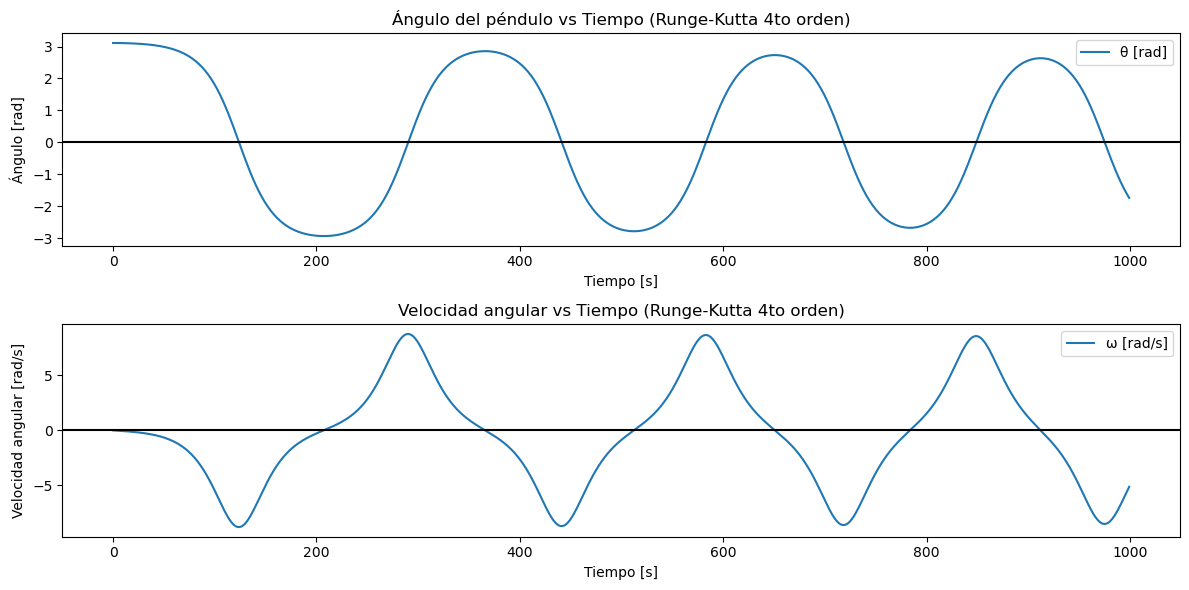

In [48]:
#Parámetros
h = 0.01 # [s] Intervalo de tiempo entre cada iteración
g = 9.81 # [m/s^2]
l = 0.5 # [m]
x = 0.99*np.pi #[rad]
v = 0.0 #[m/s]

#Función que describe la aceleración angular
def f(x,v):
    return -(g/l)*np.sin(x) 

#Declaración de los vectores donde se guardarán los valores
X = np.zeros(1000)
V = np.zeros(1000)
T = np.zeros(1000)

#Simulación usando el método de Runge-Kutta
for t in range(1000):
    k1 = h*v
    l1 = h*f(x,v)
    k2 = h*(v+l1/2)
    l2 = h*f(x + k1/2, v + l1/2)
    k3 = h*(v+l2/2)
    l3 = h*f(x+k2/2,v+l2)
    k4 = h*(v+l3)
    l4 = h*f(x+2*k3,v+2*l3)
    x = x + (1/6)*(k1+2*k2+2*k3+k4)
    v = v + (1/6)*(l1+2*l2+2*l3+l4)
    #Almacenando los valores de las variables a medida que se itera t
    X[t] = x
    V[t] = v
    T[t] = t+h

#Graficando la función
plt.figure(figsize=(12,6))

#Gráfica θ (X) vs t
plt.subplot(2,1,1)
plt.plot(T,X, label = 'θ [rad]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title('Ángulo del péndulo vs Tiempo (Runge-Kutta 4to orden)')
plt.legend()

#Gráfica ω(v) vs t
plt.subplot(2,1,2)
plt.plot(T,V, label='ω [rad/s]')
plt.axhline(0, color='black', linestyle='-')  # Línea en el eje X
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Velocidad angular vs Tiempo (Runge-Kutta 4to orden)')
plt.legend()

plt.tight_layout() #Ajusta los márgenes de las gráficas para no encimarlas

Con este método se tiene aún más precisión y se podría pensar que tomando n términos en la serie sería posible obtener métodos más precisos (con errores cada vez más pequeños), sin embargo, este sólo es válido para $n<4$, lo cual ha sido demostrado en la literatura.

De cualquier modo, los métodos que resulten son también cada vez más complicados de programar e involucran más operaciones al aumentar significativamente el número de llamadas a la función que describe la aceleración, lo cual se ve reflejado fuertemente en el tiempo de cómputo requerido, lo cual nos lleva a tener un compromiso entre precisión y rápidez de cálculo.

